## 単純なCNNモデルの作成

もしも```ModuleNotFoundError: No module named 'keras'```
といったエラーが出力された場合は
```!pip install keras```
を実行してanacondaにkerasをインストールしてください。

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### モデルのコンパイル

In [3]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### ImageDataGeneratorを使ってディレクトリから画像を読み込む

In [4]:
import pandas as pd
import os
base_dir = "mini_pictures"
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"valid")
test_dir = os.path.join(base_dir,"test")
mini_metadata = pd.read_csv('mini_metadata.csv',index_col=0)
classes = mini_metadata["make_model"].value_counts().index.tolist().sort()
print(classes)
# mini_metadata.groupby("make_model").nunique()

['Toyota-tacoma', 'Jeep-wrangler', 'BMW-x3', 'Audi-q5', 'Volkswagen-cc', 'Mercedes-Benz-glk', 'Audi-a3', 'MINI-countryman', 'Mazda-mazda5', 'Mercedes-Benz-gla', 'Mitsubishi-outlander', 'Honda-pilot', 'Nissan-370z', 'BMW-1-series', 'Audi-a5', 'Nissan-rogue-select', 'BMW-4-series', 'Subaru-outback', 'Nissan-quest', 'MINI-clubman']


In [5]:
from keras.preprocessing.image import ImageDataGenerator
#すべての画像を1/255スケーリング
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#flow_from_directoryではcategoricalのラベリングはclassesを参照して、ディレクトリ名から自動的にone-hotエンコードされる
train_generator = train_datagen.flow_from_directory(
    train_dir,               #ターゲットディレクトリ
    target_size=(150, 150),  #すべての画像サイズを150*150に変換
    batch_size=20,           #バッチサイズ
    class_mode='categorical',
    classes=classes)#categorical_crossentropyを使用するため多クラスラベルが必要

validation_generator = test_datagen.flow_from_directory(
    valid_dir,               #ヴァリデーションディレクトリ
    target_size=(150, 150),  #すべての画像サイズを150*150に変換
    batch_size=20,           #バッチサイズ
    class_mode='categorical',
    classes=classes)#categorical_crossentropyを使用するため多クラスラベルが必要


Found 1912 images belonging to 20 classes.
Found 657 images belonging to 20 classes.


### バッチジェネレータを使ってモデルを適応

In [6]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 150s 1s/step - loss: 2.9745 - acc: 0.0778 - val_loss: 2.9347 - val_acc: 0.1615
Epoch 2/30
100/100 [==============================] - 150s 1s/step - loss: 2.7178 - acc: 0.1903 - val_loss: 2.4569 - val_acc: 0.2394
Epoch 3/30
100/100 [==============================] - 136s 1s/step - loss: 2.3274 - acc: 0.3087 - val_loss: 1.9832 - val_acc: 0.2869
Epoch 4/30
100/100 [==============================] - 132s 1s/step - loss: 1.9725 - acc: 0.4066 - val_loss: 1.9469 - val_acc: 0.3903
Epoch 5/30
100/100 [==============================] - 131s 1s/step - loss: 1.6244 - acc: 0.5070 - val_loss: 1.4593 - val_acc: 0.4564
Epoch 6/30
100/100 [==============================] - 132s 1s/step - loss: 1.3270 - acc: 0.5969 - val_loss: 1.9004 - val_acc: 0.3984
Epoch 7/30
100/100 [==============================] - 142s 1s/step - loss: 1.0605 - acc: 0.6637 - val_loss: 1.7487 - val_acc: 0.5105
Epoch 8/30
100/100 [==============================] - 149s 1s/step - 

In [7]:
model.save("simplest_cnn_model_mini.h5")

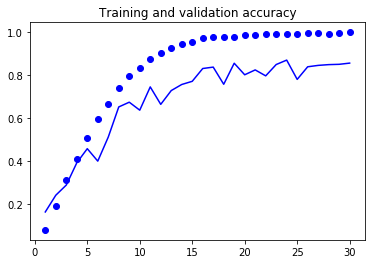

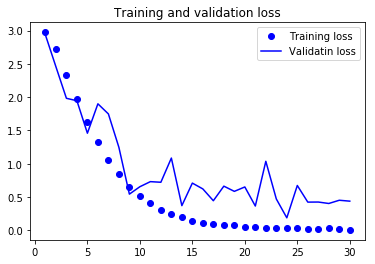

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## データ拡張
### ImageDataGeneratorを使ってデータ拡張を設定する

In [17]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True,
                            fill_mode='nearest')

mini_pictures\train\Audi-a3\Audi-a3_30e0fda8deeb_05.jpg


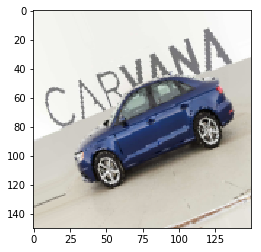

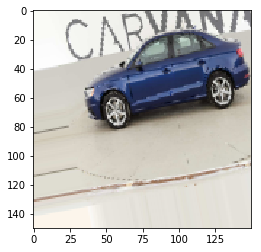

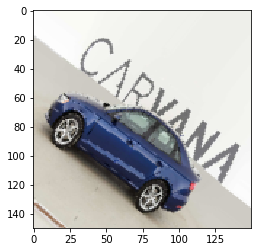

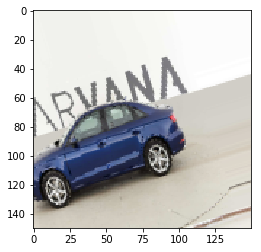

In [18]:
#ランダムに水増しされた訓練画像の表示
from keras.preprocessing import image

Audi_a3_dir = os.path.join(train_dir,"Audi-a3")
fnames = [os.path.join(Audi_a3_dir,fname) for fname in os.listdir(Audi_a3_dir)]

# 水増しする画像を選択
img_path = fnames[3]
print(image_path)

# 画像読み込み、サイズを変更
img = image.load_img(img_path, target_size=(150, 150))

# 形状が(1, 150, 150, 3)のNumpy配列に変形
x = image.img_to_array(img)

# (1, 150, 150, 3)に変形
x = x.reshape((1,) + x.shape)

# ランダムに変換した画像のバッチを生成する
# 無限ループとなるため、何らかのタイミングでbreakする必要あり
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()